In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## Creando dataframes

In [2]:
nba = pd.read_csv('nba_contracts_history.csv')

In [3]:
nba.head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0


Seleccionaremos las siguientes columnas para estudiar el fenómeno del salario de un jugador de la nba:

In [4]:
nba = nba[['NAME','CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP',
       'W', 'L', 'MIN','+/-']].drop_duplicates()

In [5]:
nba.isna().sum()

NAME              0
CONTRACT_START    0
CONTRACT_END      0
AVG_SALARY        0
AGE               0
GP                0
W                 0
L                 0
MIN               0
+/-               0
dtype: int64

Analizamos la correlación de las variables nos podemos encontrar que lo siguiente:

## Análisis Bivariable

In [6]:
nba[['NAME', 'AVG_SALARY', 'AGE', 'GP','W', 'L', 'MIN', '+/-']].corr()

,AVG_SALARY,AGE,GP,W,L,MIN,+/-
AVG_SALARY,1.000000,0.163384,0.321118,0.440450,-0.011722,0.650799,0.511799
AGE,0.163384,1.000000,0.187314,0.192270,0.065215,0.218862,0.118044
GP,0.321118,0.187314,1.000000,0.742204,0.664951,0.789263,0.165053
W,0.440450,0.192270,0.742204,1.000000,-0.007015,0.618043,0.659790
L,-0.011722,0.065215,0.664951,-0.007015,1.000000,0.488881,-0.489038
MIN,0.650799,0.218862,0.789263,0.618043,0.488881,1.000000,0.331420
+/-,0.511799,0.118044,0.165053,0.659790,-0.489038,0.331420,1.000000


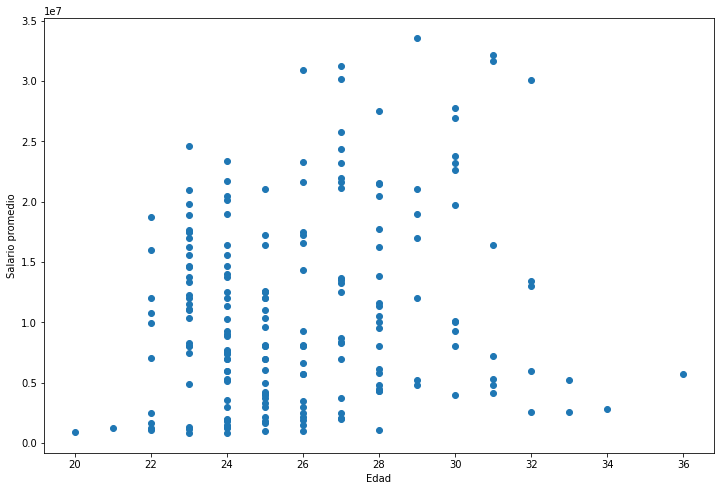

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(nba['AGE'], nba['AVG_SALARY'])

plt.xlabel('Edad')
plt.ylabel('Salario promedio');


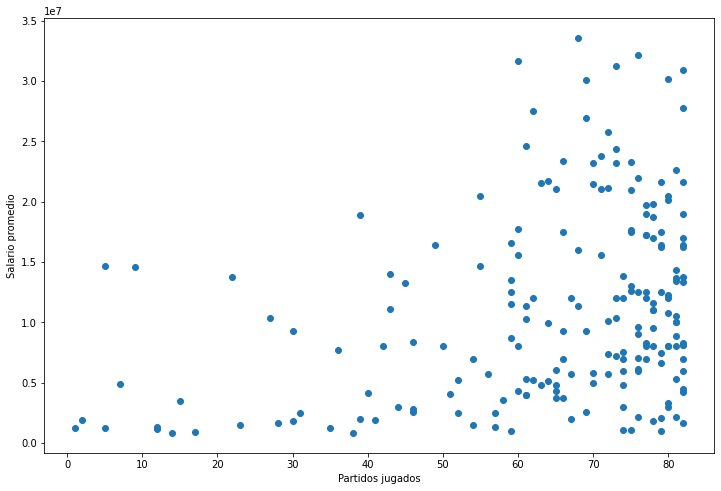

In [8]:
fig2, ax2 = plt.subplots(figsize=(12, 8))

plt.scatter(nba['GP'], nba['AVG_SALARY'])

plt.xlabel('Partidos jugados')
plt.ylabel('Salario promedio');

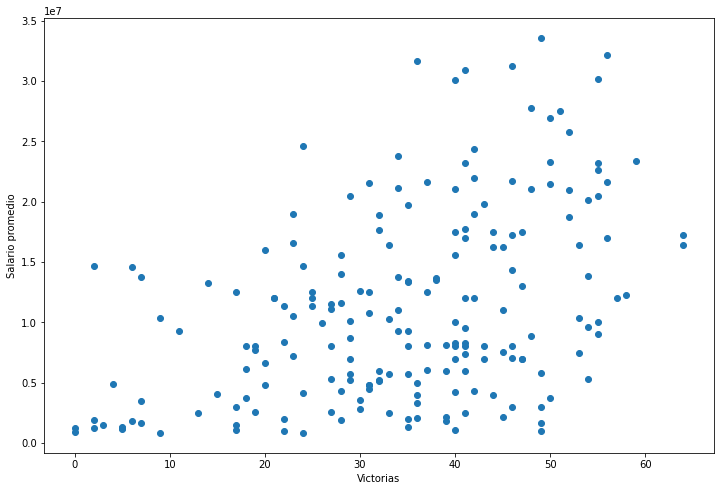

In [9]:
fig3, ax3 = plt.subplots(figsize=(12, 8))

plt.scatter(nba['W'], nba['AVG_SALARY'])

plt.xlabel('Victorias')
plt.ylabel('Salario promedio');

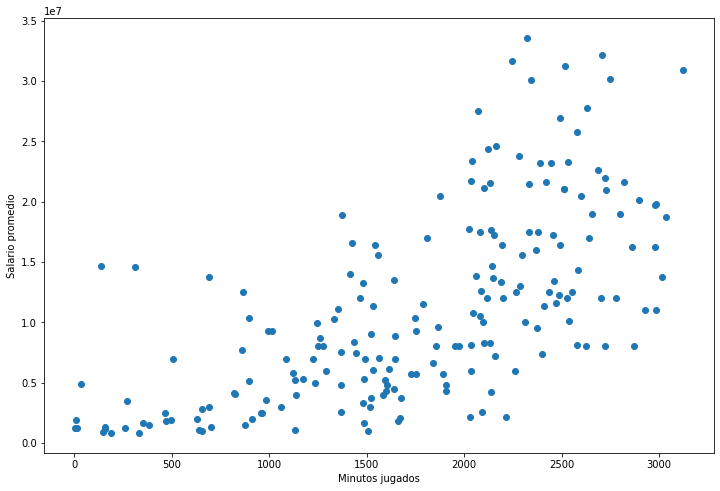

In [10]:
fig4, ax4 = plt.subplots(figsize=(12, 8))

plt.scatter(nba['MIN'], nba['AVG_SALARY'])

plt.xlabel('Minutos jugados')
plt.ylabel('Salario promedio');

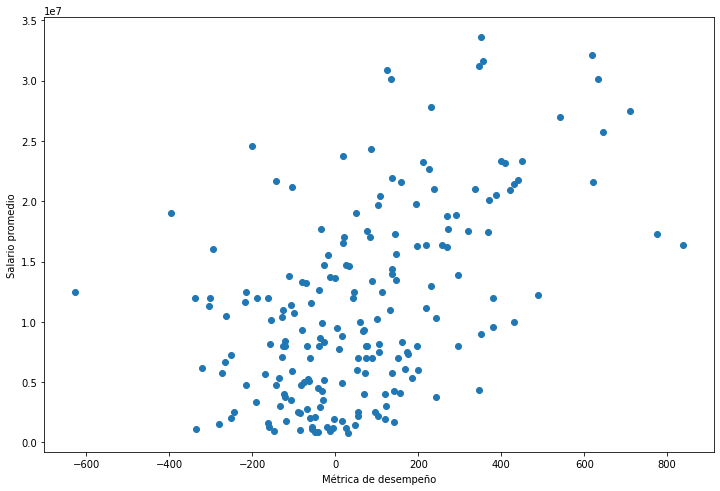

In [11]:
fig5, ax5 = plt.subplots(figsize=(12, 8))

plt.scatter(nba['+/-'], nba['AVG_SALARY'])

plt.xlabel('Métrica de desempeño')
plt.ylabel('Salario promedio');

## Regresión lineal múltiple

In [12]:
X = nba[['AGE','MIN', '+/-']]
Y = nba['AVG_SALARY']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.5365098751610411


In [14]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
coef

MIN     5749.934249
AGE     7483.301548
+/-    11938.522556
dtype: float64

In [15]:
print(f'El intercepto del modelo es {linear_model.intercept_}')

El intercepto del modelo es 262396.8805339951


In [16]:
y_pred = linear_model.predict(x_test)

In [17]:
## y_pred = linear_model.predict(x_test)
print(f'El coeficiente de ajuste R^2 es {r2_score(y_test, y_pred)}')

El coeficiente de ajuste R^2 es 0.44161363658329844


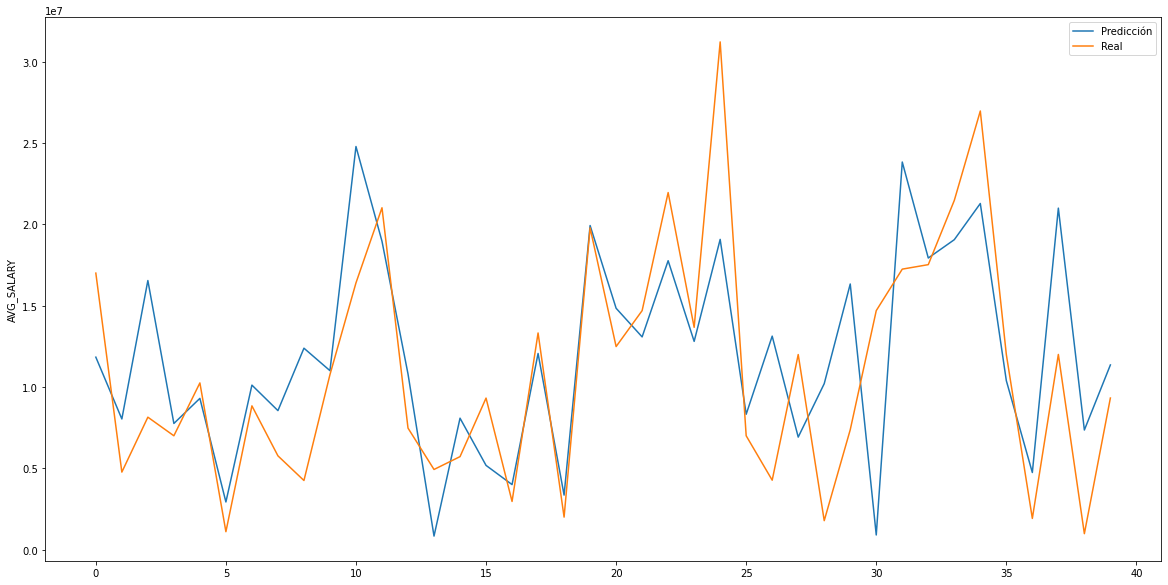

In [18]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicción')
plt.plot(y_test.values, label='Real')

plt.ylabel('AVG_SALARY')

plt.legend()
plt.show()

Finalmente nuestro modelo es de la forma $$AVG\_SALARY = \beta_0+\beta_1*AGE+\beta_2*MIN+\beta_3*MÉTRICA+\epsilon$$ 

In [19]:
Y_example = linear_model.predict([[28,2200,200]])
print(int(Y_example))

15509489


## Cálculo de errores

In [21]:
mse = mean_squared_error(y_test, y_pred)
print(f'El error cuadrático medio del modelo RLM es de {mse}')

El error cuadrático medio del modelo RLM es de 28926657130698.895


In [22]:
mae = mean_absolute_error(y_test, y_pred)
print(f'El error cuadrático medio del modelo RLM es de {mae}')

El error cuadrático medio del modelo RLM es de 4137032.8892706693


In [23]:
r2 = r2_score(y_test, y_pred)
print(f'El coeficiente de ajuste R^2 del modelo RLM es de {r2}')

El coeficiente de ajuste R^2 del modelo RLM es de 0.44161363658329844


$$\bar{R}^2 = 1-(1-R^2)*\frac{n-1}{n-p-1}$$

In [24]:
adj_r2 = 1-(1-r2_score(y_test, y_pred)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)
print(f'El coeficiente de ajuste R^2 ajustado del modelo RLM es de {adj_r2}')

El coeficiente de ajuste R^2 ajustado del modelo RLM es de 0.43297879591190613


In [25]:
r2-adj_r2

0.008634840671392308